<a href="https://colab.research.google.com/github/SenIndrani/Machine_learning_consumption_timeseries_forecasting/blob/main/assignment_Keras_set1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [2]:
from google.colab import data_table
data_table.enable_dataframe_formatter()
customer = pd.read_csv( "/content/customer_churn.csv")

In [3]:
sum(customer['gender']=="Male")

3555

In [4]:
sum(customer['InternetService']=="DSL")

2421

In [5]:
new_customer=customer[(customer['gender']=='Female') &
(customer['SeniorCitizen']==1) & (customer['PaymentMethod']=='Mailed check')]

In [6]:
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.7,Yes
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,No
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.4,No
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.6,No


In [7]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [60]:
print_unique_col_values(customer)

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
MultipleLines: ['No phone service' 0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1 'No internet service']
OnlineBackup: [1 0 'No internet service']
DeviceProtection: [0 1 'No internet service']
TechSupport: [0 1 'No internet service']
StreamingTV: [0 1 'No internet service']
StreamingMovies: [0 1 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [10]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    customer[col].replace({'Yes': 1,'No': 0},inplace=True)

In [11]:
customer['tenure'] = pd.to_numeric(customer['tenure'])

In [12]:
np.dtype(customer['tenure'])

dtype('int64')

In [13]:
new_customer=customer[(customer['tenure'] < 10 ) | (customer['MonthlyCharges'] < 100)]
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


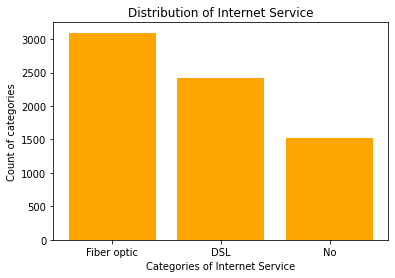

In [14]:
plt.bar(customer['InternetService'].value_counts().keys().tolist(),customer['InternetService'].value_counts().tolist(),color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of categories')
plt.title('Distribution of Internet Service')
plt.show()

In [15]:
names = customer["Churn"].value_counts().keys().tolist()
sizes= customer["Churn"].value_counts().tolist()

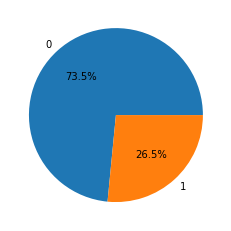

In [16]:
plt.pie(sizes,labels=names,autopct="%0.1f%%")
plt.show()

In [17]:
customer.Churn.replace({'Yes': 1,'No': 0},inplace=True)

In [18]:
x=customer[['tenure']]
y=customer[['Churn']]

In [19]:
np.unique(x)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72])

In [20]:
np.unique(y)

array([0, 1])

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [22]:
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')

In [23]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [25]:
x_train.shape

(4930, 1)

In [26]:
y_train.shape

(4930, 1)

In [42]:
model.fit(x_train, y_train, epochs=150,validation_data=(x_test,y_test))

Epoch 1/150
155/155 [==============================] - 1s 4ms/step - loss: 0.5066 - accuracy: 0.7550 - val_loss: 0.5059 - val_accuracy: 0.7525
Epoch 2/150
155/155 [==============================] - 1s 4ms/step - loss: 0.5062 - accuracy: 0.7572 - val_loss: 0.5069 - val_accuracy: 0.7525
Epoch 3/150
155/155 [==============================] - 1s 4ms/step - loss: 0.5068 - accuracy: 0.7556 - val_loss: 0.5059 - val_accuracy: 0.7525
Epoch 4/150
155/155 [==============================] - 1s 4ms/step - loss: 0.5063 - accuracy: 0.7560 - val_loss: 0.5068 - val_accuracy: 0.7525
Epoch 5/150
155/155 [==============================] - 1s 4ms/step - loss: 0.5065 - accuracy: 0.7546 - val_loss: 0.5060 - val_accuracy: 0.7525
Epoch 6/150
155/155 [==============================] - 1s 4ms/step - loss: 0.5068 - accuracy: 0.7560 - val_loss: 0.5062 - val_accuracy: 0.7525
Epoch 7/150
155/155 [==============================] - 1s 4ms/step - loss: 0.5066 - accuracy: 0.7550 - val_loss: 0.5059 - val_accuracy: 0.7525

In [28]:
import numpy as np
np.mean(model.history.history['val_accuracy'])

0.7409433643023173

In [29]:
np.mean(model.history.history['accuracy'])

0.745978358189265

In [30]:
model.evaluate(x_test,y_test)

67/67 [==============================] - 0s 2ms/step - loss: 0.5061 - accuracy: 0.7525


[0.5061025023460388, 0.7524846196174622]

In [31]:
yp = model.predict(X_test)
yp[:5]

67/67 [==============================] - 0s 1ms/step


array([[0.5679664 ],
       [0.17916116],
       [0.13470946],
       [0.5679664 ],
       [0.08942118]], dtype=float32)

In [32]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [33]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84      1539
           1       0.58      0.34      0.43       574

    accuracy                           0.75      2113
   macro avg       0.68      0.62      0.63      2113
weighted avg       0.73      0.75      0.73      2113



Text(69.0, 0.5, 'Truth')

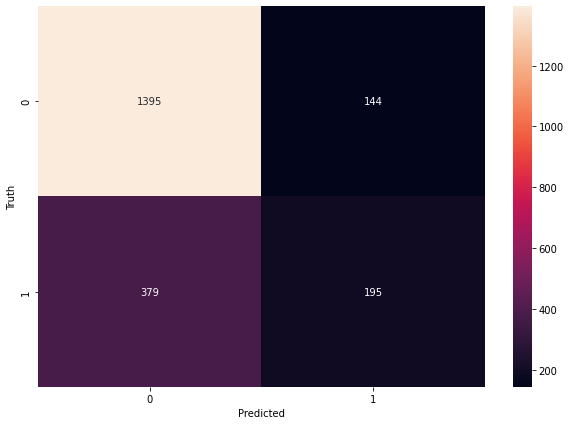

In [34]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [43]:
model.metrics_names

['loss', 'accuracy']

In [44]:
print(model.history.history.keys()) 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


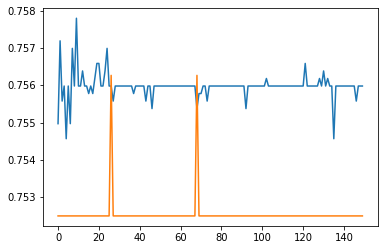

In [46]:
from matplotlib import pyplot as plt
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.show()

In [47]:
#2nd model, where we are adding a drop-out layer after the input layer and the hidden layer

In [48]:
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [98]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100,validation_data=(x_test,y_test))


Epoch 1/100
155/155 [==============================] - 2s 8ms/step - loss: 1.1015 - accuracy: 0.7497 - val_loss: 0.5633 - val_accuracy: 0.7885
Epoch 2/100
155/155 [==============================] - 1s 9ms/step - loss: 0.8052 - accuracy: 0.7404 - val_loss: 3.4539 - val_accuracy: 0.4647
Epoch 3/100
155/155 [==============================] - 1s 7ms/step - loss: 0.7982 - accuracy: 0.7420 - val_loss: 1.1634 - val_accuracy: 0.7709
Epoch 4/100
155/155 [==============================] - 1s 7ms/step - loss: 0.6650 - accuracy: 0.7550 - val_loss: 0.6383 - val_accuracy: 0.6451
Epoch 5/100
155/155 [==============================] - 1s 7ms/step - loss: 0.6404 - accuracy: 0.7465 - val_loss: 0.5245 - val_accuracy: 0.7899
Epoch 6/100
155/155 [==============================] - 1s 6ms/step - loss: 0.8523 - accuracy: 0.7426 - val_loss: 0.5110 - val_accuracy: 0.7861
Epoch 7/100
155/155 [==============================] - 1s 8ms/step - loss: 0.6345 - accuracy: 0.7501 - val_loss: 0.9266 - val_accuracy: 0.7776

67/67 [==============================] - 0s 2ms/step - loss: 0.5252 - accuracy: 0.7283


[0.5251818299293518, 0.7283483147621155]

In [52]:
print(model.history.history.keys()) 

dict_keys([])


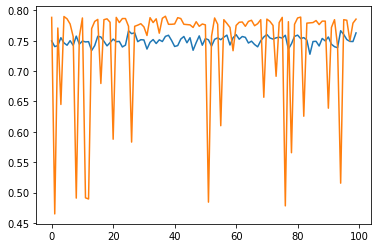

In [99]:
from matplotlib import pyplot as plt
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.show()

In [ ]:
model.evaluate(x_test,y_test)

In [57]:
customer.Churn.replace({'Yes': 1,'No': 0},inplace=True)

In [56]:
print_unique_col_values(customer)

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
MultipleLines: ['No phone service' 0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1 'No internet service']
OnlineBackup: [1 0 'No internet service']
DeviceProtection: [0 1 'No internet service']
TechSupport: [0 1 'No internet service']
StreamingTV: [0 1 'No internet service']
StreamingMovies: [0 1 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [84]:
x=customer[['MonthlyCharges','tenure','TotalCharges']]#Features
y=customer[['Churn']]#Target

In [65]:
x.shape

(7043, 3)

In [66]:
y.shape

(7043, 1)

In [73]:
customer = customer.dropna()

In [79]:
customer.TotalCharges = customer.TotalCharges.astype(float) 

In [82]:
customer['TotalCharges'] = customer['TotalCharges'].astype(float)

In [85]:
customer.TotalCharges.replace([" "], ["0"], inplace= True) 
customer.TotalCharges = customer.TotalCharges.astype(float) 

In [86]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MonthlyCharges  7043 non-null   float64
 1   tenure          7043 non-null   int64  
 2   TotalCharges    7043 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 220.1 KB


In [95]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
model = Sequential()
model.add(Dense(12, input_dim=3, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=50,validation_data=(x_test,y_test))


Epoch 1/50
155/155 [==============================] - 1s 5ms/step - loss: 4.3742 - accuracy: 0.6797 - val_loss: 4.7186 - val_accuracy: 0.4184
Epoch 2/50
155/155 [==============================] - 1s 4ms/step - loss: 1.2717 - accuracy: 0.7235 - val_loss: 0.4927 - val_accuracy: 0.7719
Epoch 3/50
155/155 [==============================] - 1s 4ms/step - loss: 0.9689 - accuracy: 0.7331 - val_loss: 3.3461 - val_accuracy: 0.4434
Epoch 4/50
155/155 [==============================] - 1s 4ms/step - loss: 0.9371 - accuracy: 0.7325 - val_loss: 1.5530 - val_accuracy: 0.7662
Epoch 5/50
155/155 [==============================] - 1s 4ms/step - loss: 1.0026 - accuracy: 0.7302 - val_loss: 0.6749 - val_accuracy: 0.7747
Epoch 6/50
155/155 [==============================] - 1s 4ms/step - loss: 0.8647 - accuracy: 0.7355 - val_loss: 0.6675 - val_accuracy: 0.7743
Epoch 7/50
155/155 [==============================] - 1s 4ms/step - loss: 0.6877 - accuracy: 0.7576 - val_loss: 0.5599 - val_accuracy: 0.7832
Epoch 

In [93]:
model.evaluate(x_test,y_test)
yp = model.predict(x_test)
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

67/67 [==============================] - 0s 1ms/step


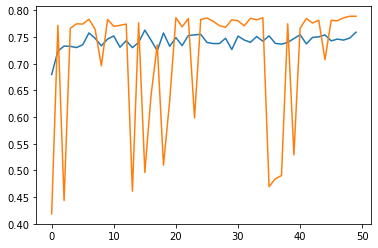

In [96]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.show()